In [1]:
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name

In [2]:
# Load teams file
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)
# Load players file
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

In [3]:
denver = find_teams_by_full_name('Denver Nuggets')[0]

denver_id = denver['id']

denver_id

1610612743

In [4]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = find_teams_by_full_name('Denver Nuggets')[0]['id'],
            player_id = find_players_by_full_name('Jamal Murray')[0]['id'],
            context_measure_simple = 'FGA',
            season_nullable = '2022-23',
            season_type_all_star = 'Regular Season')

In [5]:
shot_data = json.loads(shot_json.get_json())
relevant_data = shot_data['resultSets'][0]

In [59]:
headers = relevant_data['headers']
rows = relevant_data['rowSet']

In [60]:
jamal_data = pd.DataFrame(rows)
jamal_data.columns = headers

jamal_data.head(3)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200012,21,1627750,Jamal Murray,1610612743,Denver Nuggets,1,10,26,...,Right Side Center(RC),16-24 ft.,17,107,137,1,1,20221019,UTA,DEN
1,Shot Chart Detail,0022200012,31,1627750,Jamal Murray,1610612743,Denver Nuggets,1,9,23,...,Center(C),8-16 ft.,11,-39,111,1,0,20221019,UTA,DEN
2,Shot Chart Detail,0022200012,41,1627750,Jamal Murray,1610612743,Denver Nuggets,1,8,43,...,Center(C),Less Than 8 ft.,2,25,3,1,1,20221019,UTA,DEN


In [5]:
jamal_data = shot_json.get_data_frames()[0]

In [6]:
jamal_data.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200012,21,1627750,Jamal Murray,1610612743,Denver Nuggets,1,10,26,...,Right Side Center(RC),16-24 ft.,17,107,137,1,1,20221019,UTA,DEN
1,Shot Chart Detail,0022200012,31,1627750,Jamal Murray,1610612743,Denver Nuggets,1,9,23,...,Center(C),8-16 ft.,11,-39,111,1,0,20221019,UTA,DEN
2,Shot Chart Detail,0022200012,41,1627750,Jamal Murray,1610612743,Denver Nuggets,1,8,43,...,Center(C),Less Than 8 ft.,2,25,3,1,1,20221019,UTA,DEN
3,Shot Chart Detail,0022200012,62,1627750,Jamal Murray,1610612743,Denver Nuggets,1,6,57,...,Left Side Center(LC),24+ ft.,24,-224,90,1,0,20221019,UTA,DEN
4,Shot Chart Detail,0022200012,206,1627750,Jamal Murray,1610612743,Denver Nuggets,2,9,29,...,Right Side Center(RC),24+ ft.,24,169,184,1,0,20221019,UTA,DEN


In [7]:
def create_court(ax, color):
    
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
    return ax

In [8]:
#mpl.rcParams['font.family'] = 'Ariel'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

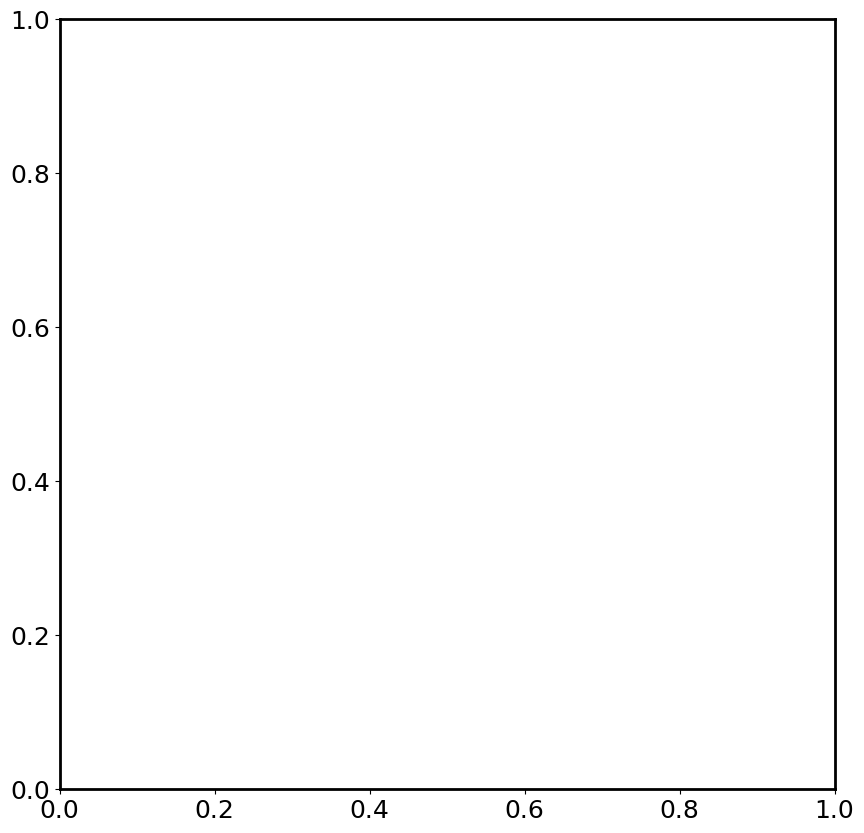

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

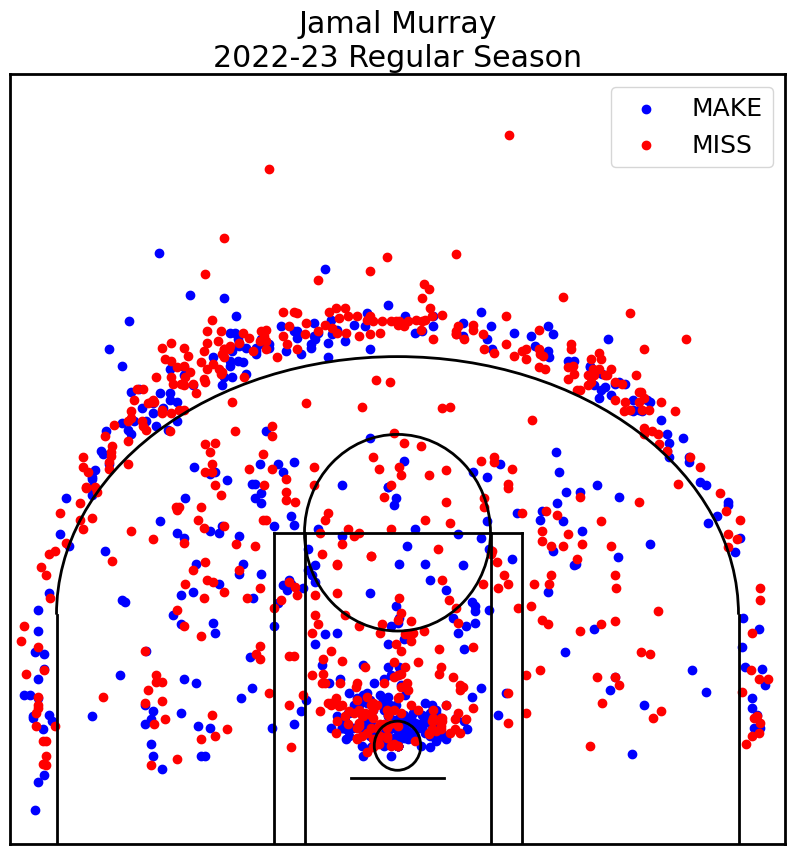

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

makes = jamal_data.loc[jamal_data.SHOT_MADE_FLAG == 1]
misses = jamal_data.loc[jamal_data.SHOT_MADE_FLAG == 0]
ax.scatter(x=makes.LOC_X, y=makes.LOC_Y + 60, c='blue', label='MAKE')
ax.scatter(x=misses.LOC_X, y=misses.LOC_Y + 60, c='red', label='MISS')

ax = create_court(ax, 'black')
ax.set_title('Jamal Murray\n2022-23 Regular Season')
plt.legend()
plt.show()

In [24]:
a = "blablablablabal"
print(a)

blablablablabal


In [ ]:
blablablablabal